In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
combined_dataset = pd.read_csv("combined_dataset1.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3964599010.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=combined_dataset, palette='pastel')


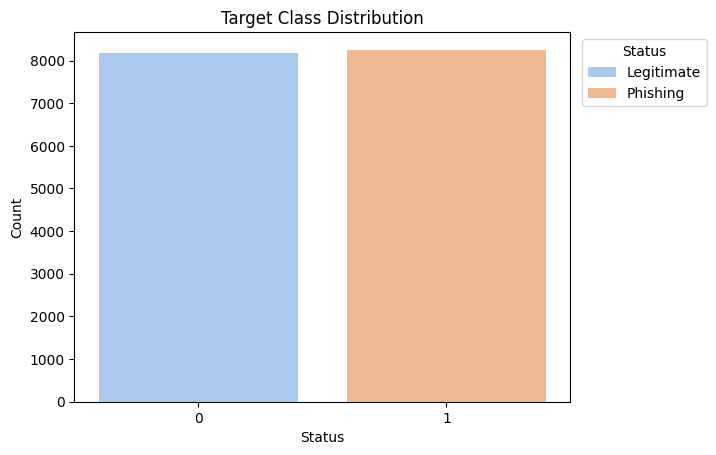

In [25]:
sns.countplot(x='status', data=combined_dataset, palette='pastel')
plt.title("Target Class Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"], title="Status", loc="upper left", bbox_to_anchor=(1.01, 1))
plt.show()

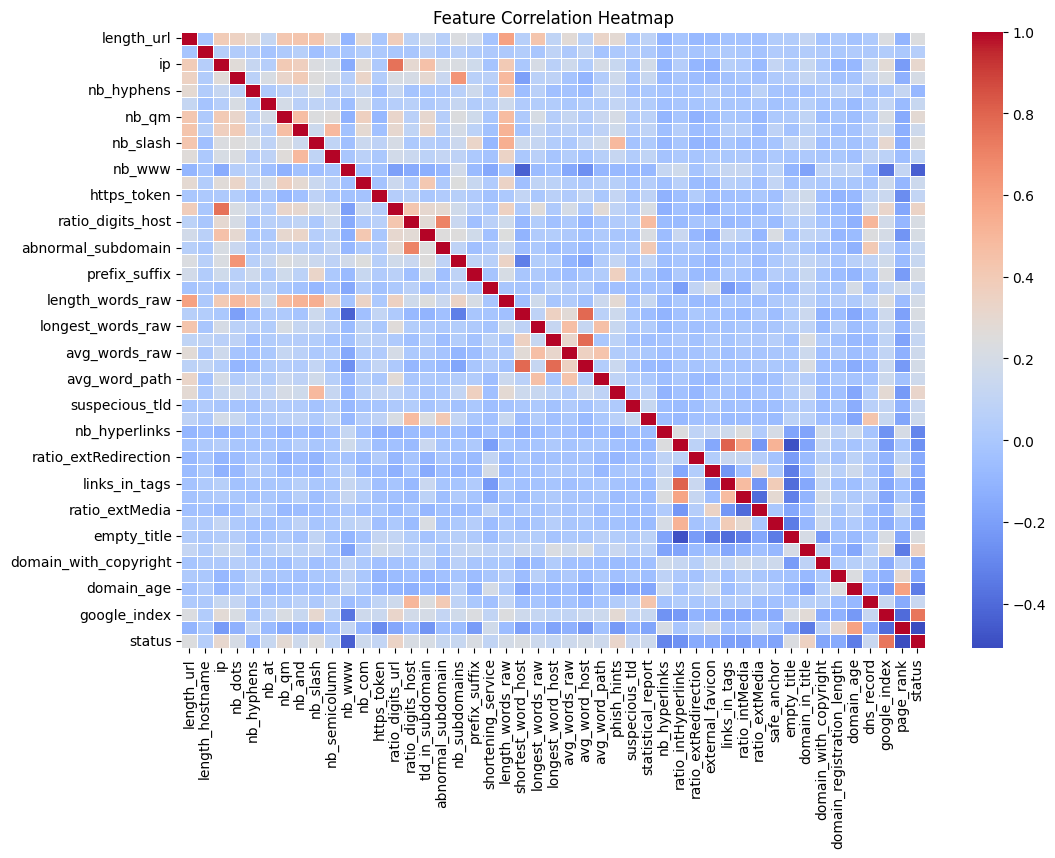

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(combined_dataset.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

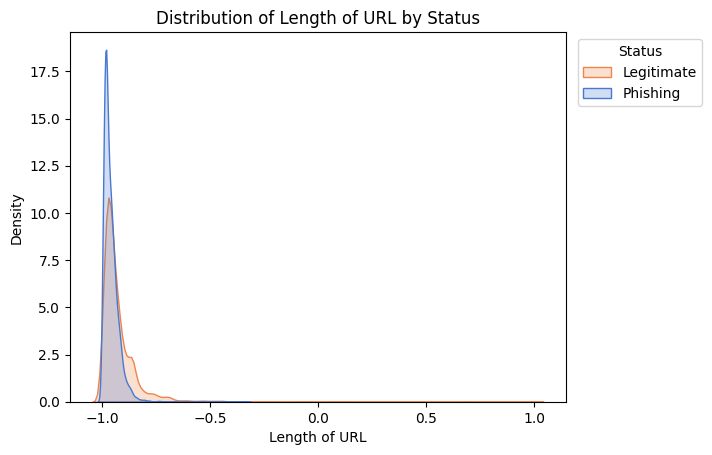

In [27]:
sns.kdeplot(data=combined_dataset, x='length_url', hue='status', fill=True, common_norm=False, palette='muted')
plt.title("Distribution of Length of URL by Status")
plt.xlabel("Length of URL")
plt.ylabel("Density")
plt.legend(labels=["Legitimate", "Phishing"], title="Status", loc="upper left", bbox_to_anchor=(1.01, 1))
plt.show()

#### There's significant overlap between the two distributions, suggesting that URL length alone is not a strong distinguishing factor for separating legitimate and phishing URLs.

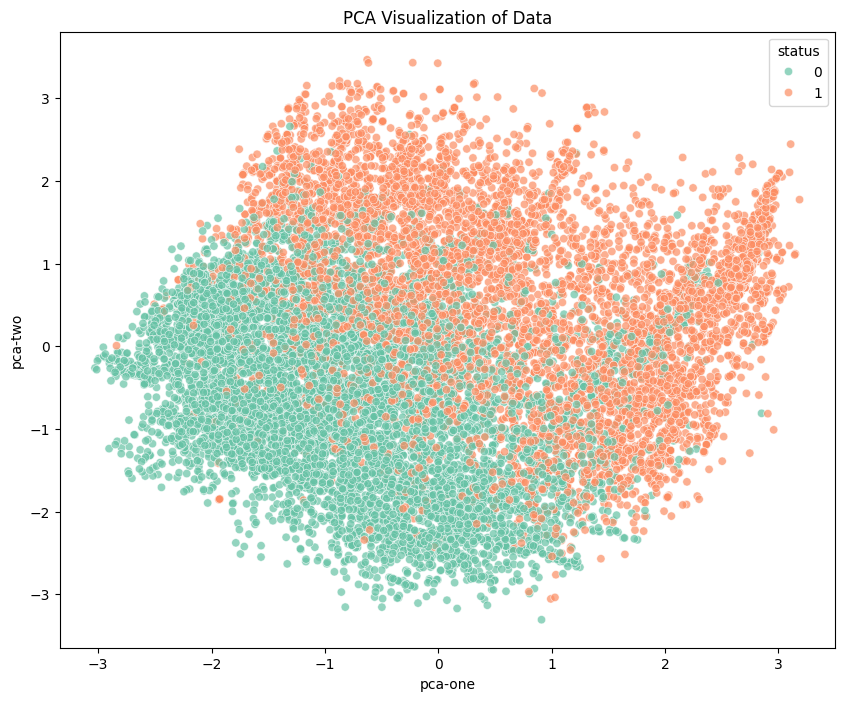

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_dataset.iloc[:, :-1])  # Exclude the target column
combined_dataset['pca-one'] = pca_result[:, 0]
combined_dataset['pca-two'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='pca-one', y='pca-two', hue='status', data=combined_dataset, palette='Set2', alpha=0.7
)
plt.title("PCA Visualization of Data")
plt.show()

# 0 = Legitimate
# 1 = Phishing


#### After processing the dataset, the PCA visualization revealed moderate separability between phishing and legitimate websites, with distinct clusters and overlapping regions. To address this, a Random Forest (RF) classifier was implemented, leveraging its ability to handle complex, non-linear relationships within the data. The RF model performed well, indicating that the current features are effective for identifying phishing websites.